In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,sys,inspect,pickle,json,time,datetime,re; root = os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))
import random as rn
%matplotlib inline
root

TARGET = 'activity'
DATA_DIR = 'activity-atactic'
INPUT_FOLDER = 'v02_add55x5x3roll'#'v00_original'
EXTRA_DATA1 = 'v00_original\\activity_test_timestamps.csv'

# load
train_data = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'train.pkl'),"rb"))
test_data  = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'test.pkl'),"rb"))
extra_data1 = pd.read_csv(os.path.join(root,'input',DATA_DIR,EXTRA_DATA1), index_col="date", parse_dates=["date"])

print('train_data',train_data.shape, 'test_data',test_data.shape, 'extra_data1',extra_data1.shape)#, 'atactic_test_target',atactic_test_target.shape,time.time()-tic,'sec')


train_data (300737, 881) test_data (85891, 880) extra_data1 (85891, 0)


In [2]:
test_data.head(1)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f46_6H_min,f47_6H_min,f48_6H_min,f49_6H_min,f50_6H_min,f51_6H_min,f52_6H_min,f53_6H_min,f54_6H_min,f55_6H_min
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:30:00,66.33918,294.978058,1.63482,0.000052,0.02007,0.00186,1.716141e+06,729420.377012,2.864499,0.596923,...,336.06653,336.13092,335.99414,336.08643,342.96463,332.88843,332.8423,491.172612,496.282786,514.367878


<img src='calendar2018.jpg'/>

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
train_data.head(2)

,activity,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f0_1H_mean,f1_1H_mean,f2_1H_mean,f3_1H_mean,f4_1H_mean,f5_1H_mean,f6_1H_mean,f7_1H_mean,f8_1H_mean,f9_1H_mean,f10_1H_mean,f11_1H_mean,f12_1H_mean,f13_1H_mean,f14_1H_mean,f15_1H_mean,f16_1H_mean,f17_1H_mean,f18_1H_mean,f19_1H_mean,f20_1H_mean,f21_1H_mean,f22_1H_mean,f23_1H_mean,f24_1H_mean,f25_1H_mean,f26_1H_mean,f27_1H_mean,f29_1H_mean,f30_1H_mean,f31_1H_mean,f32_1H_mean,f33_1H_mean,f34_1H_mean,f35_1H_mean,f36_1H_mean,f37_1H_mean,f38_1H_mean,f39_1H_mean,f40_1H_mean,f41_1H_mean,f42_1H_mean,f43_1H_mean,f44_1H_mean,f45_1H_mean,f46_1H_mean,f47_1H_mean,f48_1H_mean,f49_1H_mean,f50_1H_mean,f51_1H_mean,f52_1H_mean,f53_1H_mean,f54_1H_mean,f55_1H_mean,f0_1H_median,f1_1H_median,f2_1H_median,f3_1H_median,f4_1H_median,f5_1H_median,f6_1H_median,f7_1H_median,f8_1H_median,f9_1H_median,f10_1H_median,f11_1H_median,f12_1H_median,f13_1H_median,f14_1H_median,f15_1H_median,f16_1H_median,f17_1H_median,f18_1H_median,f19_1H_median,f20_1H_median,f21_1H_median,f22_1H_median,f23_1H_median,f24_1H_median,f25_1H_median,f26_1H_median,f27_1H_median,f29_1H_median,f30_1H_median,f31_1H_median,f32_1H_median,f33_1H_median,f34_1H_median,f35_1H_median,f36_1H_median,f37_1H_median,f38_1H_median,f39_1H_median,f40_1H_median,f41_1H_median,f42_1H_median,f43_1H_median,f44_1H_median,f45_1H_median,f46_1H_median,f47_1H_median,f48_1H_median,f49_1H_median,f50_1H_median,f51_1H_median,f52_1H_median,f53_1H_median,f54_1H_median,f55_1H_median,f0_1H_std,f1_1H_std,f2_1H_std,f3_1H_std,f4_1H_std,f5_1H_std,f6_1H_std,f7_1H_std,f8_1H_std,f9_1H_std,f10_1H_std,f11_1H_std,f12_1H_std,f13_1H_std,f14_1H_std,f15_1H_std,f16_1H_std,f17_1H_std,f18_1H_std,f19_1H_std,f20_1H_std,f21_1H_std,f22_1H_std,f23_1H_std,f24_1H_std,f25_1H_std,f26_1H_std,f27_1H_std,f29_1H_std,f30_1H_std,f31_1H_std,f32_1H_std,f33_1H_std,f34_1H_std,f35_1H_std,f36_1H_std,f37_1H_std,f38_1H_std,f39_1H_std,f40_1H_std,f41_1H_std,f42_1H_std,f43_1H_std,f44_1H_std,f45_1H_std,f46_1H_std,f47_1H_std,f48_1H_std,f49_1H_std,f50_1H_std,f51_1H_std,f52_1H_std,f53_1H_std,f54_1H_std,f55_1H_std,f0_1H_max,f1_1H_max,f2_1H_max,f3_1H_max,f4_1H_max,f5_1H_max,f6_1H_max,f7_1H_max,f8_1H_max,f9_1H_max,f10_1H_max,f11_1H_max,f12_1H_max,f13_1H_max,f14_1H_max,f15_1H_max,f16_1H_max,f17_1H_max,f18_1H_max,f19_1H_max,f20_1H_max,f21_1H_max,f22_1H_max,f23_1H_max,f24_1H_max,f25_1H_max,f26_1H_max,f27_1H_max,f29_1H_max,f30_1H_max,f31_1H_max,f32_1H_max,f33_1H_max,f34_1H_max,f35_1H_max,f36_1H_max,f37_1H_max,f38_1H_max,f39_1H_max,f40_1H_max,f41_1H_max,f42_1H_max,f43_1H_max,f44_1H_max,f45_1H_max,f46_1H_max,f47_1H_max,f48_1H_max,f49_1H_max,f50_1H_max,f51_1H_max,f52_1H_max,f53_1H_max,f54_1H_max,f55_1H_max,f0_1H_min,f1_1H_min,f2_1H_min,f3_1H_min,f4_1H_min,f5_1H_min,f6_1H_min,f7_1H_min,f8_1H_min,f9_1H_min,f10_1H_min,f11_1H_min,f12_1H_min,f13_1H_min,f14_1H_min,f15_1H_min,f16_1H_min,f17_1H_min,f18_1H_min,f19_1H_min,f20_1H_min,f21_1H_min,f22_1H_min,f23_1H_min,f24_1H_min,f25_1H_min,f26_1H_min,f27_1H_min,f29_1H_min,f30_1H_min,f31_1H_min,f32_1H_min,f33_1H_min,f34_1H_min,f35_1H_min,f36_1H_min,f37_1H_min,f38_1H_min,f39_1H_min,f40_1H_min,f41_1H_min,f42_1H_min,f43_1H_min,f44_1H_min,f45_1H_min,f46_1H_min,f47_1H_min,f48_1H_min,f49_1H_min,f50_1H_min,f51_1H_min,f52_1H_min,f53_1H_min,f54_1H_min,f55_1H_min,f0_3H_mean,f1_3H_mean,f2_3H_mean,f3_3H_mean,f4_3H_mean,f5_3H_mean,f6_3H_mean,f7_3H_mean,f8_3H_mean,f9_3H_mean,f10_3H_mean,f11_3H_mean,f12_3H_mean,f13_3H_mean,f14_3H_mean,f15_3H_mean,f16_3H_mean,f17_3H_mean,f18_3H_mean,f19_3H_mean,f20_3H_mean,f21_3H_mean,f22_3H_mean,f23_3H_mean,f24_3H_mean,f25_3H_mean,f26_3H_mean,f27_3H_mean,f29_3H_mean,f30_3H_mean,f31_3H_mean,f32_3H_mean,f33_3H_mean,f34_3H_mean,f35_3H_mean,f36_3H_mean,f37_3H_mean,f38_3H_mean,f39_3H_mean,f40_3H_mean,f41_3H_mean,f42_3H_mean,f43_3H_mean,f44_3H_mean,f45_3H_mean,f46_3H_mean,f47_3H_mean,f48_3H_mean,f49_3H_mean,f50_3H_

In [4]:
['f'+str(i) for i in range(0,10)] + ['activity'] # 25 55 12 - important

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'activity']

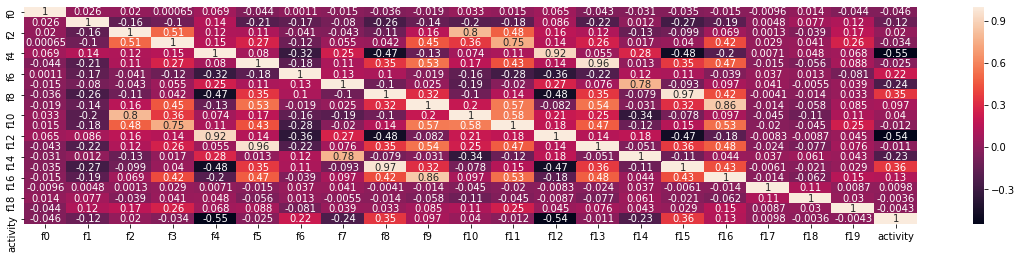

In [6]:
import seaborn as sns
plt.figure(figsize=(20, 4))
sns.heatmap(train_data[['f'+str(i) for i in range(0,20)] + ['activity']].corr(), annot=True)

In [19]:
#['f'+str(i) for i in range(20,28)] + ['f'+str(i) for i in range(29,40)]

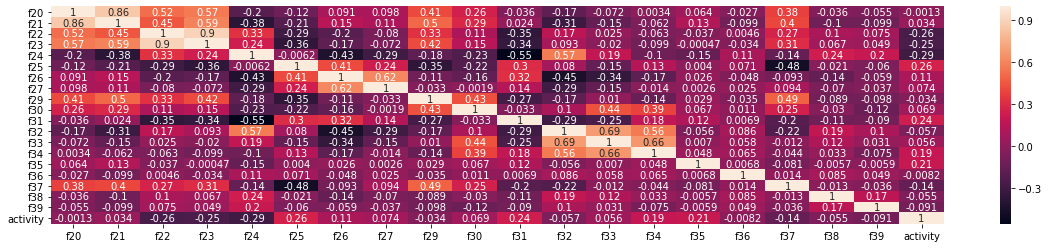

In [11]:
plt.figure(figsize=(20, 4))
sns.heatmap(train_data[['f'+str(i) for i in range(20,28)] + ['f'+str(i) for i in range(29,40)] + ['activity']].corr(), annot=True)

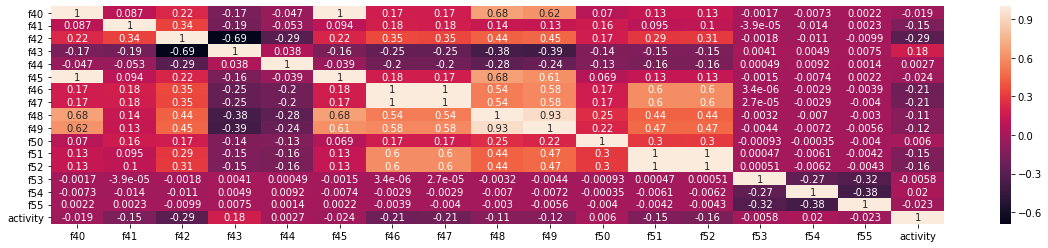

In [12]:
plt.figure(figsize=(20, 4))
sns.heatmap(train_data[['f'+str(i) for i in range(40,56)] + ['activity']].corr(), annot=True)

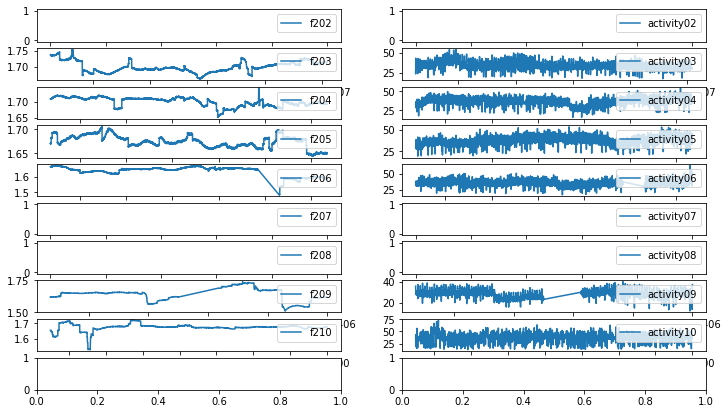

In [18]:
curr_data = train_data
col1='f2'
col2='activity'

fig, axarr = plt.subplots(10, 2, figsize=(12, 7))
for mon in ['02','03','04','05','06','07','08','09','10']: # range(3,9):
    #axarr[int(mon)-2][0].plot(curr_data[col1]["2018-"+mon+"-01 08:30:00":"2018-"+str((int(mon)+1)).zfill(2)+"-01 08:30:00"], label=col1+mon)
    axarr[int(mon)-2][0].plot(curr_data[col1]["2018-"+mon+"-01 08:30:00":"2018-"+str((int(mon)+0)).zfill(2)+"-07 08:30:00"], label=col1+mon)
    axarr[int(mon)-2][0].legend(loc="upper right")
    #axarr[int(mon)-2][1].plot(curr_data[col2]["2018-"+mon+"-01 08:30:00":"2018-"+str((int(mon)+1)).zfill(2)+"-01 08:30:00"], label=col2+mon)
    axarr[int(mon)-2][1].plot(curr_data[col2]["2018-"+mon+"-01 08:30:00":"2018-"+str((int(mon)+0)).zfill(2)+"-07 08:30:00"], label=col2+mon)
    axarr[int(mon)-2][1].legend(loc="upper right")        
plt.show()

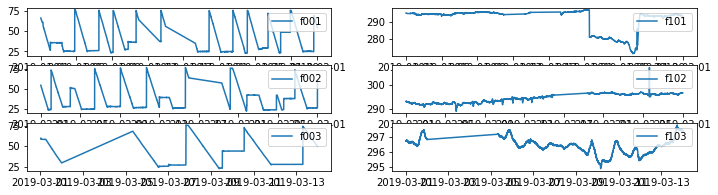

In [14]:
curr_data = test_data
months = ['01','02','03']
col1='f0'
col2='f1'

fig, axarr = plt.subplots(3, 2, figsize=(12, 3))
for mon in months: # range(3,9):
    axarr[int(mon)-1][0].plot(curr_data[col1]["2019-"+mon+"-01 00:30:00":"2019-"+str((int(mon)+1)).zfill(2)+"-01 00:30:00"], label=col1+mon)
    axarr[int(mon)-1][0].legend(loc="upper right")
    axarr[int(mon)-1][1].plot(curr_data[col2]["2019-"+mon+"-01 00:30:00":"2019-"+str((int(mon)+1)).zfill(2)+"-01 00:30:00"], label=col2+mon)
    axarr[int(mon)-1][1].legend(loc="upper right")        
plt.show()

In [15]:
train_data["2018-02-13 08:30:00":"2018-02-13 08:31:00"]

,activity,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f0_1H_mean,f1_1H_mean,f2_1H_mean,f3_1H_mean,f4_1H_mean,f5_1H_mean,f6_1H_mean,f7_1H_mean,f8_1H_mean,f9_1H_mean,f10_1H_mean,f11_1H_mean,f12_1H_mean,f13_1H_mean,f14_1H_mean,f15_1H_mean,f16_1H_mean,f17_1H_mean,f18_1H_mean,f19_1H_mean,f20_1H_mean,f21_1H_mean,f22_1H_mean,f23_1H_mean,f24_1H_mean,f25_1H_mean,f26_1H_mean,f27_1H_mean,f29_1H_mean,f30_1H_mean,f31_1H_mean,f32_1H_mean,f33_1H_mean,f34_1H_mean,f35_1H_mean,f36_1H_mean,f37_1H_mean,f38_1H_mean,f39_1H_mean,f40_1H_mean,f41_1H_mean,f42_1H_mean,f43_1H_mean,f44_1H_mean,f45_1H_mean,f46_1H_mean,f47_1H_mean,f48_1H_mean,f49_1H_mean,f50_1H_mean,f51_1H_mean,f52_1H_mean,f53_1H_mean,f54_1H_mean,f55_1H_mean,f0_1H_median,f1_1H_median,f2_1H_median,f3_1H_median,f4_1H_median,f5_1H_median,f6_1H_median,f7_1H_median,f8_1H_median,f9_1H_median,f10_1H_median,f11_1H_median,f12_1H_median,f13_1H_median,f14_1H_median,f15_1H_median,f16_1H_median,f17_1H_median,f18_1H_median,f19_1H_median,f20_1H_median,f21_1H_median,f22_1H_median,f23_1H_median,f24_1H_median,f25_1H_median,f26_1H_median,f27_1H_median,f29_1H_median,f30_1H_median,f31_1H_median,f32_1H_median,f33_1H_median,f34_1H_median,f35_1H_median,f36_1H_median,f37_1H_median,f38_1H_median,f39_1H_median,f40_1H_median,f41_1H_median,f42_1H_median,f43_1H_median,f44_1H_median,f45_1H_median,f46_1H_median,f47_1H_median,f48_1H_median,f49_1H_median,f50_1H_median,f51_1H_median,f52_1H_median,f53_1H_median,f54_1H_median,f55_1H_median,f0_1H_std,f1_1H_std,f2_1H_std,f3_1H_std,f4_1H_std,f5_1H_std,f6_1H_std,f7_1H_std,f8_1H_std,f9_1H_std,f10_1H_std,f11_1H_std,f12_1H_std,f13_1H_std,f14_1H_std,f15_1H_std,f16_1H_std,f17_1H_std,f18_1H_std,f19_1H_std,f20_1H_std,f21_1H_std,f22_1H_std,f23_1H_std,f24_1H_std,f25_1H_std,f26_1H_std,f27_1H_std,f29_1H_std,f30_1H_std,f31_1H_std,f32_1H_std,f33_1H_std,f34_1H_std,f35_1H_std,f36_1H_std,f37_1H_std,f38_1H_std,f39_1H_std,f40_1H_std,f41_1H_std,f42_1H_std,f43_1H_std,f44_1H_std,f45_1H_std,f46_1H_std,f47_1H_std,f48_1H_std,f49_1H_std,f50_1H_std,f51_1H_std,f52_1H_std,f53_1H_std,f54_1H_std,f55_1H_std,f0_1H_max,f1_1H_max,f2_1H_max,f3_1H_max,f4_1H_max,f5_1H_max,f6_1H_max,f7_1H_max,f8_1H_max,f9_1H_max,f10_1H_max,f11_1H_max,f12_1H_max,f13_1H_max,f14_1H_max,f15_1H_max,f16_1H_max,f17_1H_max,f18_1H_max,f19_1H_max,f20_1H_max,f21_1H_max,f22_1H_max,f23_1H_max,f24_1H_max,f25_1H_max,f26_1H_max,f27_1H_max,f29_1H_max,f30_1H_max,f31_1H_max,f32_1H_max,f33_1H_max,f34_1H_max,f35_1H_max,f36_1H_max,f37_1H_max,f38_1H_max,f39_1H_max,f40_1H_max,f41_1H_max,f42_1H_max,f43_1H_max,f44_1H_max,f45_1H_max,f46_1H_max,f47_1H_max,f48_1H_max,f49_1H_max,f50_1H_max,f51_1H_max,f52_1H_max,f53_1H_max,f54_1H_max,f55_1H_max,f0_1H_min,f1_1H_min,f2_1H_min,f3_1H_min,f4_1H_min,f5_1H_min,f6_1H_min,f7_1H_min,f8_1H_min,f9_1H_min,f10_1H_min,f11_1H_min,f12_1H_min,f13_1H_min,f14_1H_min,f15_1H_min,f16_1H_min,f17_1H_min,f18_1H_min,f19_1H_min,f20_1H_min,f21_1H_min,f22_1H_min,f23_1H_min,f24_1H_min,f25_1H_min,f26_1H_min,f27_1H_min,f29_1H_min,f30_1H_min,f31_1H_min,f32_1H_min,f33_1H_min,f34_1H_min,f35_1H_min,f36_1H_min,f37_1H_min,f38_1H_min,f39_1H_min,f40_1H_min,f41_1H_min,f42_1H_min,f43_1H_min,f44_1H_min,f45_1H_min,f46_1H_min,f47_1H_min,f48_1H_min,f49_1H_min,f50_1H_min,f51_1H_min,f52_1H_min,f53_1H_min,f54_1H_min,f55_1H_min,f0_3H_mean,f1_3H_mean,f2_3H_mean,f3_3H_mean,f4_3H_mean,f5_3H_mean,f6_3H_mean,f7_3H_mean,f8_3H_mean,f9_3H_mean,f10_3H_mean,f11_3H_mean,f12_3H_mean,f13_3H_mean,f14_3H_mean,f15_3H_mean,f16_3H_mean,f17_3H_mean,f18_3H_mean,f19_3H_mean,f20_3H_mean,f21_3H_mean,f22_3H_mean,f23_3H_mean,f24_3H_mean,f25_3H_mean,f26_3H_mean,f27_3H_mean,f29_3H_mean,f30_3H_mean,f31_3H_mean,f32_3H_mean,f33_3H_mean,f34_3H_mean,f35_3H_mean,f36_3H_mean,f37_3H_mean,f38_3H_mean,f39_3H_mean,f40_3H_mean,f41_3H_mean,f42_3H_mean,f43_3H_mean,f44_3H_mean,f45_3H_mean,f46_3H_mean,f47_3H_mean,f48_3H_mean,f49_3H_mean,f50_3H_

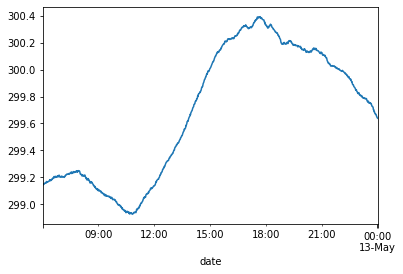

In [29]:
train_data['f1']["2018-05-12 00:01:00":"2018-05-13 00:01:00"].plot() # 12 and 19 feb - monday

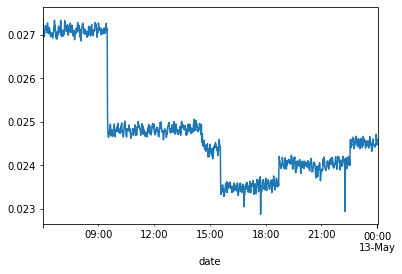

In [2]:
train_data['f4']["2018-05-12 00:01:00":"2018-05-13 00:01:00"].plot() # 12 and 19 feb - monday

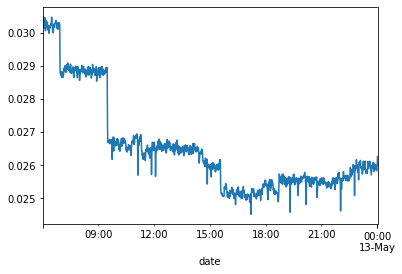

In [4]:
train_data['f12']["2018-05-12 00:01:00":"2018-05-13 00:01:00"].plot() # 12 and 19 feb - monday

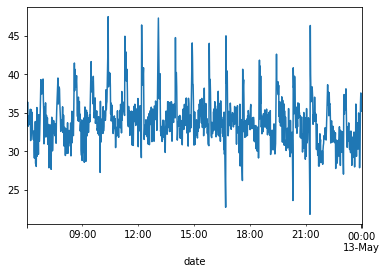

In [3]:
train_data['activity']["2018-05-12 00:01:00":"2018-05-13 00:01:00"].plot() # 12 and 19 feb - monday

In [28]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
df = train_data["2018-05-12 00:06:00":"2018-05-12 06:01:00"]
df

,activity,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f0_1H_mean,f1_1H_mean,f2_1H_mean,f3_1H_mean,f4_1H_mean,f5_1H_mean,f6_1H_mean,f7_1H_mean,f8_1H_mean,f9_1H_mean,f10_1H_mean,f11_1H_mean,f12_1H_mean,f13_1H_mean,f14_1H_mean,f15_1H_mean,f16_1H_mean,f17_1H_mean,f18_1H_mean,f19_1H_mean,f20_1H_mean,f21_1H_mean,f22_1H_mean,f23_1H_mean,f24_1H_mean,f25_1H_mean,f26_1H_mean,f27_1H_mean,f29_1H_mean,f30_1H_mean,f31_1H_mean,f32_1H_mean,f33_1H_mean,f34_1H_mean,f35_1H_mean,f36_1H_mean,f37_1H_mean,f38_1H_mean,f39_1H_mean,f40_1H_mean,f41_1H_mean,f42_1H_mean,f43_1H_mean,f44_1H_mean,f45_1H_mean,f46_1H_mean,f47_1H_mean,f48_1H_mean,f49_1H_mean,f50_1H_mean,f51_1H_mean,f52_1H_mean,f53_1H_mean,f54_1H_mean,f55_1H_mean,f0_1H_median,f1_1H_median,f2_1H_median,f3_1H_median,f4_1H_median,f5_1H_median,f6_1H_median,f7_1H_median,f8_1H_median,f9_1H_median,f10_1H_median,f11_1H_median,f12_1H_median,f13_1H_median,f14_1H_median,f15_1H_median,f16_1H_median,f17_1H_median,f18_1H_median,f19_1H_median,f20_1H_median,f21_1H_median,f22_1H_median,f23_1H_median,f24_1H_median,f25_1H_median,f26_1H_median,f27_1H_median,f29_1H_median,f30_1H_median,f31_1H_median,f32_1H_median,f33_1H_median,f34_1H_median,f35_1H_median,f36_1H_median,f37_1H_median,f38_1H_median,f39_1H_median,f40_1H_median,f41_1H_median,f42_1H_median,f43_1H_median,f44_1H_median,f45_1H_median,f46_1H_median,f47_1H_median,f48_1H_median,f49_1H_median,f50_1H_median,f51_1H_median,f52_1H_median,f53_1H_median,f54_1H_median,f55_1H_median,f0_1H_std,f1_1H_std,f2_1H_std,f3_1H_std,f4_1H_std,f5_1H_std,f6_1H_std,f7_1H_std,f8_1H_std,f9_1H_std,f10_1H_std,f11_1H_std,f12_1H_std,f13_1H_std,f14_1H_std,f15_1H_std,f16_1H_std,f17_1H_std,f18_1H_std,f19_1H_std,f20_1H_std,f21_1H_std,f22_1H_std,f23_1H_std,f24_1H_std,f25_1H_std,f26_1H_std,f27_1H_std,f29_1H_std,f30_1H_std,f31_1H_std,f32_1H_std,f33_1H_std,f34_1H_std,f35_1H_std,f36_1H_std,f37_1H_std,f38_1H_std,f39_1H_std,f40_1H_std,f41_1H_std,f42_1H_std,f43_1H_std,f44_1H_std,f45_1H_std,f46_1H_std,f47_1H_std,f48_1H_std,f49_1H_std,f50_1H_std,f51_1H_std,f52_1H_std,f53_1H_std,f54_1H_std,f55_1H_std,f0_1H_max,f1_1H_max,f2_1H_max,f3_1H_max,f4_1H_max,f5_1H_max,f6_1H_max,f7_1H_max,f8_1H_max,f9_1H_max,f10_1H_max,f11_1H_max,f12_1H_max,f13_1H_max,f14_1H_max,f15_1H_max,f16_1H_max,f17_1H_max,f18_1H_max,f19_1H_max,f20_1H_max,f21_1H_max,f22_1H_max,f23_1H_max,f24_1H_max,f25_1H_max,f26_1H_max,f27_1H_max,f29_1H_max,f30_1H_max,f31_1H_max,f32_1H_max,f33_1H_max,f34_1H_max,f35_1H_max,f36_1H_max,f37_1H_max,f38_1H_max,f39_1H_max,f40_1H_max,f41_1H_max,f42_1H_max,f43_1H_max,f44_1H_max,f45_1H_max,f46_1H_max,f47_1H_max,f48_1H_max,f49_1H_max,f50_1H_max,f51_1H_max,f52_1H_max,f53_1H_max,f54_1H_max,f55_1H_max,f0_1H_min,f1_1H_min,f2_1H_min,f3_1H_min,f4_1H_min,f5_1H_min,f6_1H_min,f7_1H_min,f8_1H_min,f9_1H_min,f10_1H_min,f11_1H_min,f12_1H_min,f13_1H_min,f14_1H_min,f15_1H_min,f16_1H_min,f17_1H_min,f18_1H_min,f19_1H_min,f20_1H_min,f21_1H_min,f22_1H_min,f23_1H_min,f24_1H_min,f25_1H_min,f26_1H_min,f27_1H_min,f29_1H_min,f30_1H_min,f31_1H_min,f32_1H_min,f33_1H_min,f34_1H_min,f35_1H_min,f36_1H_min,f37_1H_min,f38_1H_min,f39_1H_min,f40_1H_min,f41_1H_min,f42_1H_min,f43_1H_min,f44_1H_min,f45_1H_min,f46_1H_min,f47_1H_min,f48_1H_min,f49_1H_min,f50_1H_min,f51_1H_min,f52_1H_min,f53_1H_min,f54_1H_min,f55_1H_min,f0_3H_mean,f1_3H_mean,f2_3H_mean,f3_3H_mean,f4_3H_mean,f5_3H_mean,f6_3H_mean,f7_3H_mean,f8_3H_mean,f9_3H_mean,f10_3H_mean,f11_3H_mean,f12_3H_mean,f13_3H_mean,f14_3H_mean,f15_3H_mean,f16_3H_mean,f17_3H_mean,f18_3H_mean,f19_3H_mean,f20_3H_mean,f21_3H_mean,f22_3H_mean,f23_3H_mean,f24_3H_mean,f25_3H_mean,f26_3H_mean,f27_3H_mean,f29_3H_mean,f30_3H_mean,f31_3H_mean,f32_3H_mean,f33_3H_mean,f34_3H_mean,f35_3H_mean,f36_3H_mean,f37_3H_mean,f38_3H_mean,f39_3H_mean,f40_3H_mean,f41_3H_mean,f42_3H_mean,f43_3H_mean,f44_3H_mean,f45_3H_mean,f46_3H_mean,f47_3H_mean,f48_3H_mean,f49_3H_mean,f50_3H_

In [36]:
catal_concentrate = (df['f4'][0]+df['f12'][0]) / (df['f2'][0] + df['f3'][0] + df['f4'][0] + df['f5'][0] + df['f10'][0] + df['f11'][0] + df['f12'][0] + df['f13'][0] + df['f20'][0] + df['f21'][0] + df['f22'][0] + df['f23'][0])   #2 3 4 5 10 11 12 13
catal_concentrate

0.008647051099668998

In [38]:
catal_activity = df['activity'][0]
catal_activity

34.7970548872789

In [39]:
react_speed = catal_activity * catal_concentrate
react_speed

0.30089191172828744

In [42]:
df

,activity,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f0_1H_mean,f1_1H_mean,f2_1H_mean,f3_1H_mean,f4_1H_mean,f5_1H_mean,f6_1H_mean,f7_1H_mean,f8_1H_mean,f9_1H_mean,f10_1H_mean,f11_1H_mean,f12_1H_mean,f13_1H_mean,f14_1H_mean,f15_1H_mean,f16_1H_mean,f17_1H_mean,f18_1H_mean,f19_1H_mean,f20_1H_mean,f21_1H_mean,f22_1H_mean,f23_1H_mean,f24_1H_mean,f25_1H_mean,f26_1H_mean,f27_1H_mean,f29_1H_mean,f30_1H_mean,f31_1H_mean,f32_1H_mean,f33_1H_mean,f34_1H_mean,f35_1H_mean,f36_1H_mean,f37_1H_mean,f38_1H_mean,f39_1H_mean,f40_1H_mean,f41_1H_mean,f42_1H_mean,f43_1H_mean,f44_1H_mean,f45_1H_mean,f46_1H_mean,f47_1H_mean,f48_1H_mean,f49_1H_mean,f50_1H_mean,f51_1H_mean,f52_1H_mean,f53_1H_mean,f54_1H_mean,f55_1H_mean,f0_1H_median,f1_1H_median,f2_1H_median,f3_1H_median,f4_1H_median,f5_1H_median,f6_1H_median,f7_1H_median,f8_1H_median,f9_1H_median,f10_1H_median,f11_1H_median,f12_1H_median,f13_1H_median,f14_1H_median,f15_1H_median,f16_1H_median,f17_1H_median,f18_1H_median,f19_1H_median,f20_1H_median,f21_1H_median,f22_1H_median,f23_1H_median,f24_1H_median,f25_1H_median,f26_1H_median,f27_1H_median,f29_1H_median,f30_1H_median,f31_1H_median,f32_1H_median,f33_1H_median,f34_1H_median,f35_1H_median,f36_1H_median,f37_1H_median,f38_1H_median,f39_1H_median,f40_1H_median,f41_1H_median,f42_1H_median,f43_1H_median,f44_1H_median,f45_1H_median,f46_1H_median,f47_1H_median,f48_1H_median,f49_1H_median,f50_1H_median,f51_1H_median,f52_1H_median,f53_1H_median,f54_1H_median,f55_1H_median,f0_1H_std,f1_1H_std,f2_1H_std,f3_1H_std,f4_1H_std,f5_1H_std,f6_1H_std,f7_1H_std,f8_1H_std,f9_1H_std,f10_1H_std,f11_1H_std,f12_1H_std,f13_1H_std,f14_1H_std,f15_1H_std,f16_1H_std,f17_1H_std,f18_1H_std,f19_1H_std,f20_1H_std,f21_1H_std,f22_1H_std,f23_1H_std,f24_1H_std,f25_1H_std,f26_1H_std,f27_1H_std,f29_1H_std,f30_1H_std,f31_1H_std,f32_1H_std,f33_1H_std,f34_1H_std,f35_1H_std,f36_1H_std,f37_1H_std,f38_1H_std,f39_1H_std,f40_1H_std,f41_1H_std,f42_1H_std,f43_1H_std,f44_1H_std,f45_1H_std,f46_1H_std,f47_1H_std,f48_1H_std,f49_1H_std,f50_1H_std,f51_1H_std,f52_1H_std,f53_1H_std,f54_1H_std,f55_1H_std,f0_1H_max,f1_1H_max,f2_1H_max,f3_1H_max,f4_1H_max,f5_1H_max,f6_1H_max,f7_1H_max,f8_1H_max,f9_1H_max,f10_1H_max,f11_1H_max,f12_1H_max,f13_1H_max,f14_1H_max,f15_1H_max,f16_1H_max,f17_1H_max,f18_1H_max,f19_1H_max,f20_1H_max,f21_1H_max,f22_1H_max,f23_1H_max,f24_1H_max,f25_1H_max,f26_1H_max,f27_1H_max,f29_1H_max,f30_1H_max,f31_1H_max,f32_1H_max,f33_1H_max,f34_1H_max,f35_1H_max,f36_1H_max,f37_1H_max,f38_1H_max,f39_1H_max,f40_1H_max,f41_1H_max,f42_1H_max,f43_1H_max,f44_1H_max,f45_1H_max,f46_1H_max,f47_1H_max,f48_1H_max,f49_1H_max,f50_1H_max,f51_1H_max,f52_1H_max,f53_1H_max,f54_1H_max,f55_1H_max,f0_1H_min,f1_1H_min,f2_1H_min,f3_1H_min,f4_1H_min,f5_1H_min,f6_1H_min,f7_1H_min,f8_1H_min,f9_1H_min,f10_1H_min,f11_1H_min,f12_1H_min,f13_1H_min,f14_1H_min,f15_1H_min,f16_1H_min,f17_1H_min,f18_1H_min,f19_1H_min,f20_1H_min,f21_1H_min,f22_1H_min,f23_1H_min,f24_1H_min,f25_1H_min,f26_1H_min,f27_1H_min,f29_1H_min,f30_1H_min,f31_1H_min,f32_1H_min,f33_1H_min,f34_1H_min,f35_1H_min,f36_1H_min,f37_1H_min,f38_1H_min,f39_1H_min,f40_1H_min,f41_1H_min,f42_1H_min,f43_1H_min,f44_1H_min,f45_1H_min,f46_1H_min,f47_1H_min,f48_1H_min,f49_1H_min,f50_1H_min,f51_1H_min,f52_1H_min,f53_1H_min,f54_1H_min,f55_1H_min,f0_3H_mean,f1_3H_mean,f2_3H_mean,f3_3H_mean,f4_3H_mean,f5_3H_mean,f6_3H_mean,f7_3H_mean,f8_3H_mean,f9_3H_mean,f10_3H_mean,f11_3H_mean,f12_3H_mean,f13_3H_mean,f14_3H_mean,f15_3H_mean,f16_3H_mean,f17_3H_mean,f18_3H_mean,f19_3H_mean,f20_3H_mean,f21_3H_mean,f22_3H_mean,f23_3H_mean,f24_3H_mean,f25_3H_mean,f26_3H_mean,f27_3H_mean,f29_3H_mean,f30_3H_mean,f31_3H_mean,f32_3H_mean,f33_3H_mean,f34_3H_mean,f35_3H_mean,f36_3H_mean,f37_3H_mean,f38_3H_mean,f39_3H_mean,f40_3H_mean,f41_3H_mean,f42_3H_mean,f43_3H_mean,f44_3H_mean,f45_3H_mean,f46_3H_mean,f47_3H_mean,f48_3H_mean,f49_3H_mean,f50_3H_

In [48]:
df[df.iloc[0] < 1]

D:\Programs\x64\Anaconda_3_2019_07\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match